In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import keras
from keras.layers import Embedding, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

np.set_printoptions(precision=4, suppress=True)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../datas.csv', sep=',', index_col='id')

subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming',
            'stat', 'pde', 'functional', 'variational', 'random_proc', 'numerical']
years = [13, 14, 15, 16, 17]

df['mean'] = df[subjects].mean(axis=1)
df['round'] = np.rint(df['mean'].values)

df.loc[df['year'] == 13, 'k'] = 0.8
df.loc[df['year'] == 14, 'k'] = 0.5
df.loc[df['year'] >= 15, 'k'] = 0.3

In [4]:
train_df = df.loc[df['year'] <= 15]

x_train = train_df[['k', 'ege']].values
y_train = train_df['round'].values - 3

test_df = df.loc[df['year'] > 15]
x_test = test_df[['k', 'ege']].values
y_test = test_df['round'].values - 3

x_additional = np.array([
    [0.8, 243], [0.8, 239], [0.8, 237], [0.8, 235], [0.8, 234], [0.8, 233], [0.8, 232], [0.8, 231], 
    [0.8, 230], [0.8, 229], [0.8, 228], [0.8, 227], [0.8, 226], [0.8, 225], [0.8, 224], [0.8, 223], 
    [0.8, 222], [0.8, 221], [0.8, 220], [0.8, 219], 
    [0.5, 235], [0.5, 220], [0.5, 218], [0.5, 217], [0.5, 215], [0.5, 214], [0.5, 213], [0.5, 210], 
    [0.5, 209], [0.5, 207], [0.5, 206], [0.5, 205], [0.5, 203], [0.5, 200], [0.5, 199], [0.5, 195], 
    [0.5, 193], [0.5, 192], [0.5, 191], [0.5, 190], 
    [0.3, 244], [0.3, 222], [0.3, 215], [0.3, 213], [0.3, 211], [0.3, 209], [0.3, 206], [0.3, 205], 
    [0.3, 204], [0.3, 203], [0.3, 202], [0.3, 201], [0.3, 200], [0.3, 199], [0.3, 197], [0.3, 196], 
    [0.3, 194], [0.3, 193], [0.3, 191], [0.3, 191]
])
y_additional = np.array([
    2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,2,2,2,1,1,1,1,
    1,1,1,1,1,1,1,1,0,0,0,0,0])

x = np.concatenate((x_train, x_additional), axis=0)
y = np.concatenate((y_train, y_additional), axis=0)

In [5]:
max_features = 1024

model = Sequential()

model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=3)
history = model.fit(x_train, one_hot_labels, epochs=100, batch_size=20, verbose=1, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60/60 [==============================] - 1s 23ms/step - loss: 1.0765 - categorical_accuracy: 0.5167
Epoch 2/100
60/60 [==============================] - 0s 506us/step - loss: 1.0250 - categorical_accuracy: 0.5333
Epoch 3/100
60/60 [==============================] - 0s 535us/step - loss: 0.9768 - categorical_accuracy: 0.5833
Epoch 4/100
60/60 [==============================] - 0s 463us/step - loss: 0.9154 - categorical_accuracy: 0.6500
Epoch 5/100
60/60 [==============================] - 0s 502us/step - loss: 0.8723 - categorical_accuracy: 0.6333
Epoch 6/100
60/60 [==============================] - 0s 532us/step - loss: 0.8331 - categorical_accuracy: 0.6000
Epoch 7/100
60/60 [==============================] - 0s 593us/step - loss: 0.7890 - categorical_accuracy: 0.7667
Epoch 8/100
60/60 [==============================] - 0s 528us/step - loss: 0.7622 - categorical_accuracy: 0.7833
Epoch 9/100
60/60 [==============================

60/60 [==============================] - 0s 422us/step - loss: 0.1530 - categorical_accuracy: 0.9167
Epoch 71/100
60/60 [==============================] - 0s 399us/step - loss: 0.1601 - categorical_accuracy: 0.9167
Epoch 72/100
60/60 [==============================] - 0s 431us/step - loss: 0.1738 - categorical_accuracy: 0.9333
Epoch 73/100
60/60 [==============================] - 0s 381us/step - loss: 0.1639 - categorical_accuracy: 0.8833
Epoch 74/100
60/60 [==============================] - 0s 421us/step - loss: 0.1524 - categorical_accuracy: 0.9167
Epoch 75/100
60/60 [==============================] - 0s 457us/step - loss: 0.1732 - categorical_accuracy: 0.9167
Epoch 76/100
60/60 [==============================] - 0s 490us/step - loss: 0.1646 - categorical_accuracy: 0.9000
Epoch 77/100
60/60 [==============================] - 0s 453us/step - loss: 0.1421 - categorical_accuracy: 0.9167
Epoch 78/100
60/60 [==============================] - 0s 481us/step - loss: 0.1527 - categorical_accu

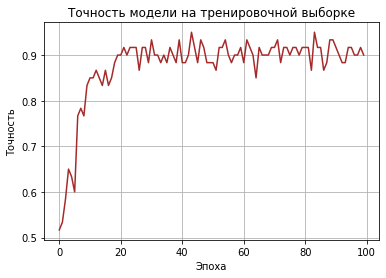

In [7]:
plt.plot(history.history['categorical_accuracy'], color='brown')
plt.grid()
plt.title('Точность модели на тренировочной выборке')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.savefig('enrollee_acc.png', dpi=300)

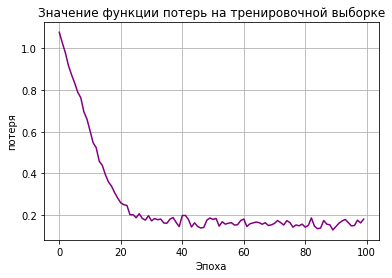

In [8]:
plt.plot(history.history['loss'], color='purple')
plt.grid()
plt.title('Значение функции потерь на тренировочной выборке')
plt.ylabel('потеря')
plt.xlabel('Эпоха')
plt.savefig('enrollee_loss.png', dpi=300)

### Пронозирование успеваемости абитуриентов за 2016 год

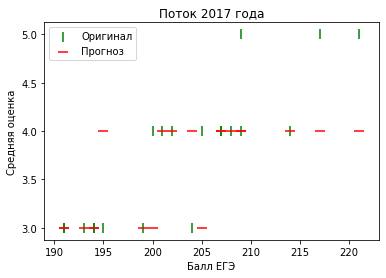

In [14]:
df_16 = df.loc[df['year'] == 16][['ege', 'k', 'round']]
x_test_16 = df_16[['k', 'ege']].values
y_test_16 = df_16['round'].values - 3

y_predict_16 = model.predict(x_test_16)
y_predict_16 = list(map(lambda y : y.argmax()+3, y_predict_16))

marker_size = [100 for i in range(len(x))]

plt.scatter(x_test_16[:, 1], y_test_16+3, marker='|', color='green', s=marker_size)
plt.scatter(x_test_16[:, 1], y_predict_16, marker='_', color='red', s=marker_size)

plt.title('Поток 2017 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка')
plt.legend(['Оригинал', 'Прогноз']);

### Пронозирование успеваемости абитуриентов за 2017 год

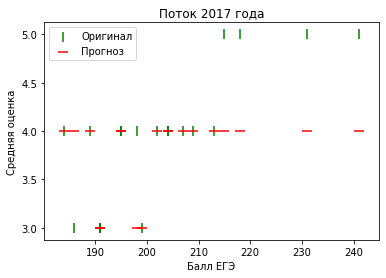

In [16]:
df_17 = df.loc[df['year'] == 17][['ege', 'k', 'round']]
x_test_17 = df_17[['k', 'ege']].values
y_test_17 = df_17['round'].values - 3

y_predict_17 = model.predict(x_test_17)
y_predict_17 = list(map(lambda y : y.argmax()+3, y_predict_17))

marker_size = [100 for i in range(len(x))]

plt.scatter(x_test_17[:, 1], y_test_17+3, marker='|', color='green', s=marker_size)
plt.scatter(x_test_17[:, 1], y_predict_17, marker='_', color='red', s=marker_size)

plt.title('Поток 2017 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка')
plt.legend(['Оригинал', 'Прогноз']);

In [17]:
#model.save('enrollee_acc_90.h5')